In [1]:
# CIFAR-10 데이터셋 : 10가지 사물이 담긴 컬러 이미지
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
# 6만장 (학습용 5만장, 검증용 1만장)
# 32x32 이미지
# 32x32x3 RGB 컬러 이미지
# http://www.cs.toronto.edu/~kriz/cifar.html
from tensorflow.keras import datasets, utils
def make_data():
    # 다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

    # 원 핫 인코딩 처리
    y_train = utils.to_categorical(y_train,10)
    y_test = utils.to_categorical(y_test,10)
    # 데이터 정규화
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    return (X_train,y_train), (X_test,y_test)

In [2]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout
def make_model():
    model = Sequential()
    # padding = "same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0, 25))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    # 학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

In [3]:
a = isinstance(1, int) # True
b = isinstance(1.2, float) # True

In [4]:
def plot_loss(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    # 타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [5]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [6]:
(X_train,y_train),(X_test,y_test)=make_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

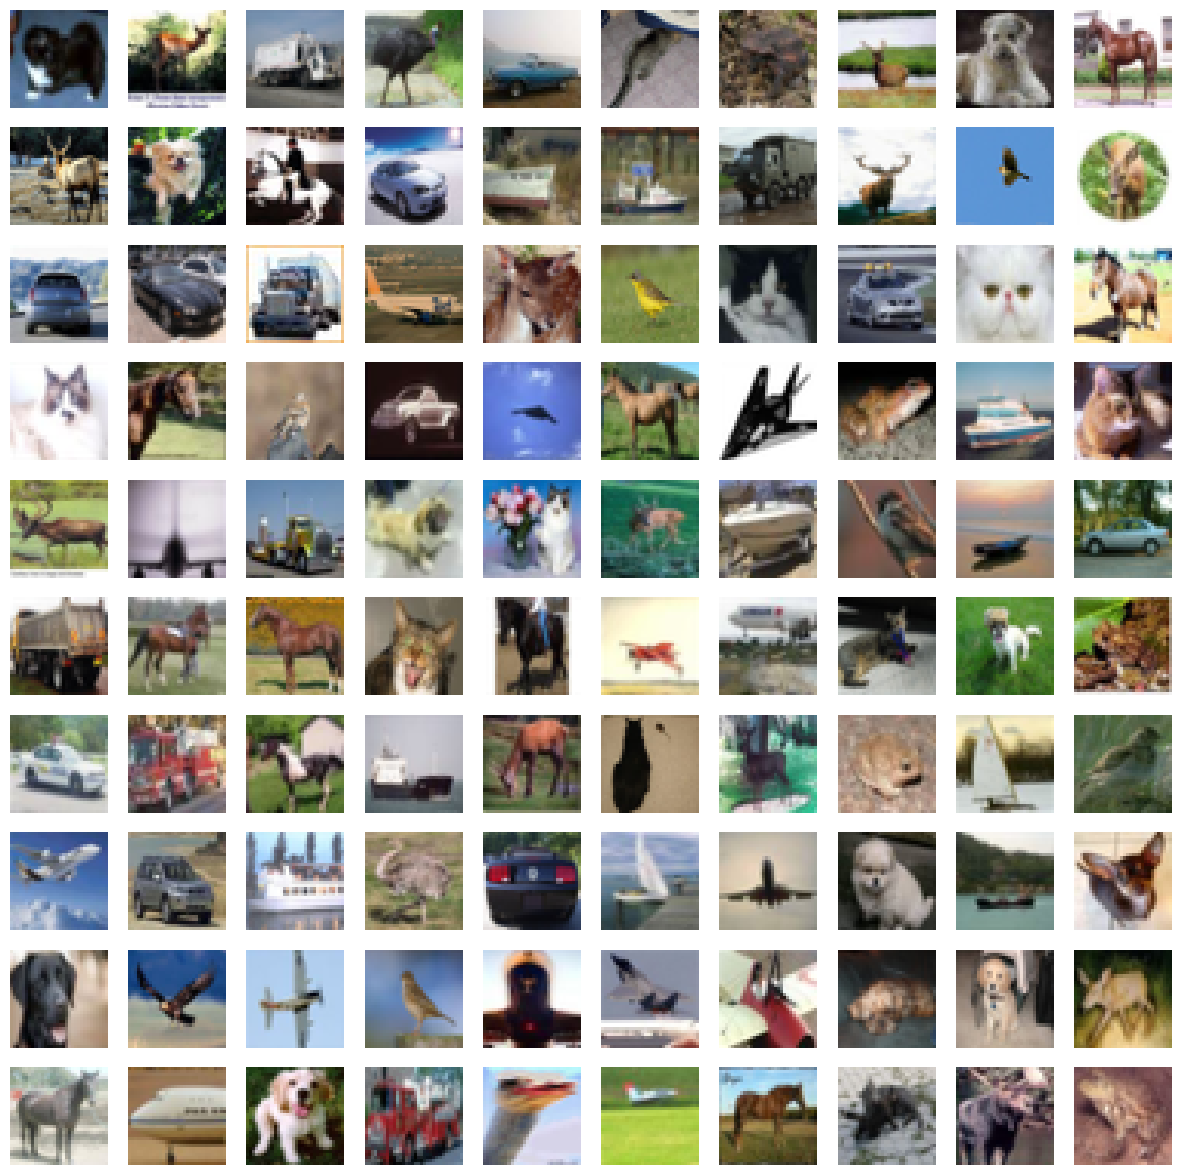

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes1 = plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [9]:
# 모델 생성
model = make_model()

In [10]:
# 학습 시간이 오래 걸림
import tensorflow as tf
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)


Epoch 1/3
1250/1250 [==============================] - 103s 82ms/step - loss: 1.7227 - accuracy: 0.3771 - val_loss: 1.5016 - val_accuracy: 0.4580
Epoch 2/3
1250/1250 [==============================] - 109s 87ms/step - loss: 1.4318 - accuracy: 0.4888 - val_loss: 1.3942 - val_accuracy: 0.4967
Epoch 3/3
1250/1250 [==============================] - 112s 89ms/step - loss: 1.2954 - accuracy: 0.5415 - val_loss: 1.2479 - val_accuracy: 0.5647


In [11]:
# 성능 평가
performance_test = model.evaluate(X_test,y_test,batch_size=128)
print(performance_test)

79/79 [==============================] - 3s 36ms/step - loss: 1.2426 - accuracy: 0.5601
[1.242599606513977, 0.5601000189781189]


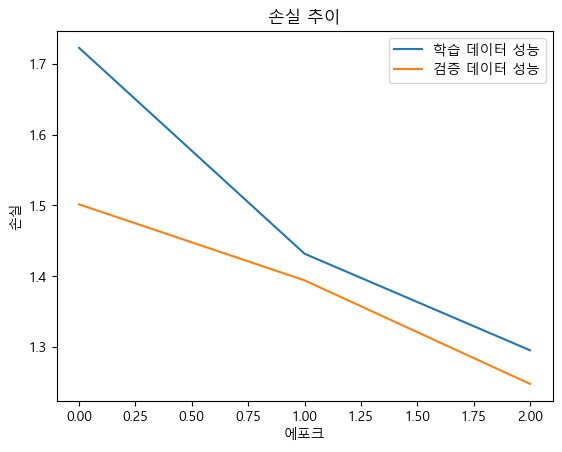

In [12]:
import matplotlib
import matplotlib.font_manager as fm
font_location = "c:/windows/fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc("font",family=font_name)
plot_loss(history,"손실 추이")
plt.show()

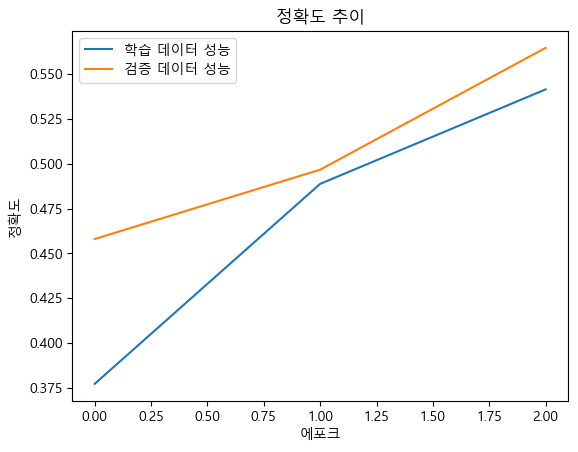

In [13]:
plot_acc(history, '정확도 추이')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test,axis=1),y_pred)

313/313 [==============================] - 4s 12ms/step


array([[524,  72,  16,  25,  22,  24,   9,   8, 228,  72],
       [  8, 777,   1,   7,   2,   8,   7,   5,  45, 140],
       [ 92,  39, 174, 104, 190, 199,  78,  46,  39,  39],
       [ 20,  34,  14, 344,  87, 305,  83,  25,  28,  60],
       [ 33,  25,  22,  75, 500, 121, 103,  71,  32,  18],
       [ 15,  14,  13, 135,  59, 644,  26,  45,  24,  25],
       [  7,  23,  16,  79,  67,  66, 672,   9,  13,  48],
       [ 16,  21,  10,  72,  79, 141,  19, 548,  14,  80],
       [ 45,  88,   1,  11,   5,  10,   5,   7, 760,  68],
       [ 23, 201,   3,  15,   6,  16,  10,  12,  56, 658]], dtype=int64)

In [15]:
model.save('../models/cifar/cifar.h5')